In [ ]:
# NAME : GANGOTHRI DEVI M
# COLLEGE : GARDEN CITY UNIVERSITY
# COURSE : B TECH CSE - DATA SCIENCE

In [1]:
# PlayStore Data Analysis Bootcamp Project

# 🔹 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# 🔹 Step 2: Load the Cleaned Dataset
df = pd.read_csv('/content/cleaned_playstore.csv')

# Display basic info
print("Dataset Overview:")
print(df.info())

# Display first few rows
df.head()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  float64
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
 13  isPaid          10357 non-null  int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 1.1+ MB
None


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,isPaid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


Dataset Loaded Successfully!

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  float64
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
 13  isPaid          10357 non-null  int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 1.1+ MB
None

Preview:
                                              

/tmp/ipython-input-1041694915.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_count.index, y=category_count.values, palette="viridis")


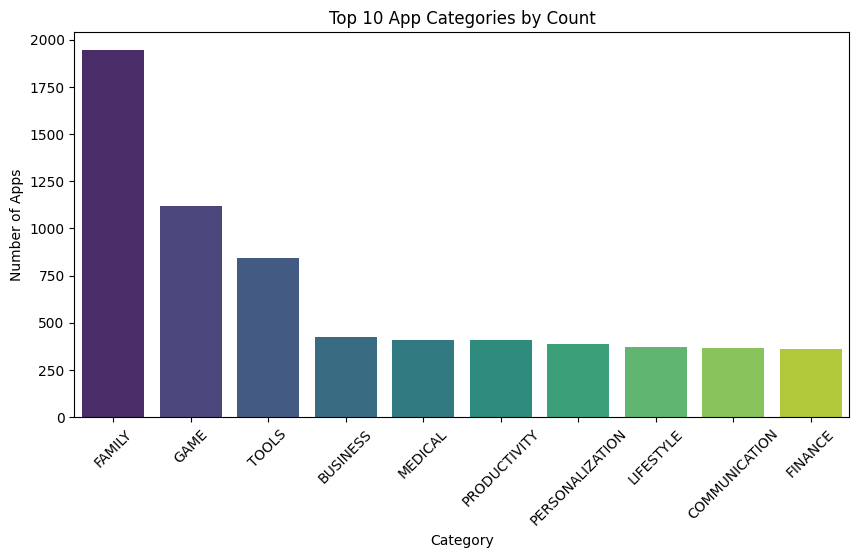

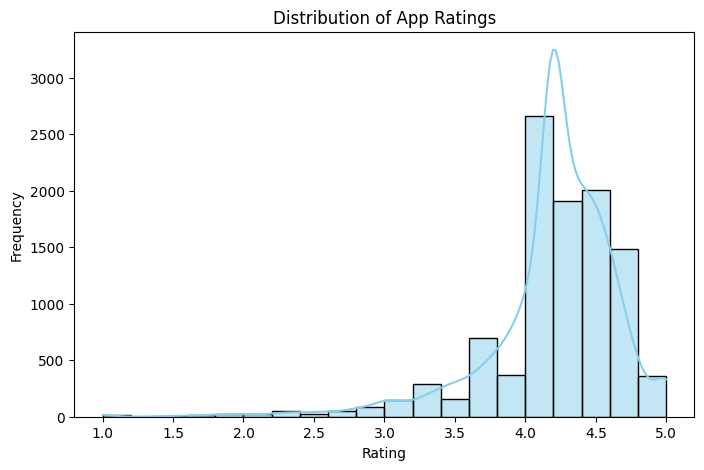

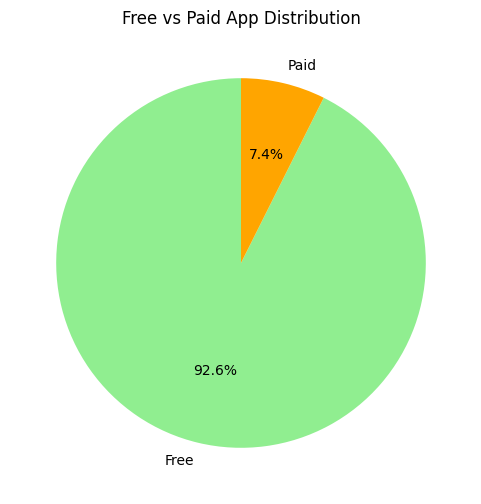

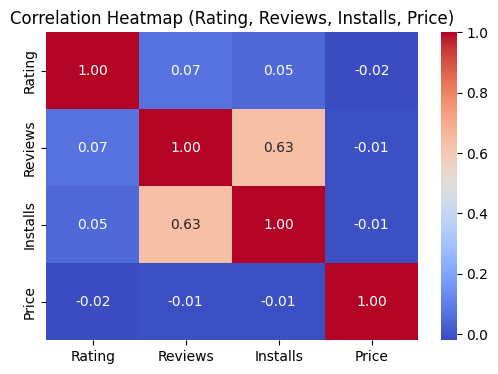

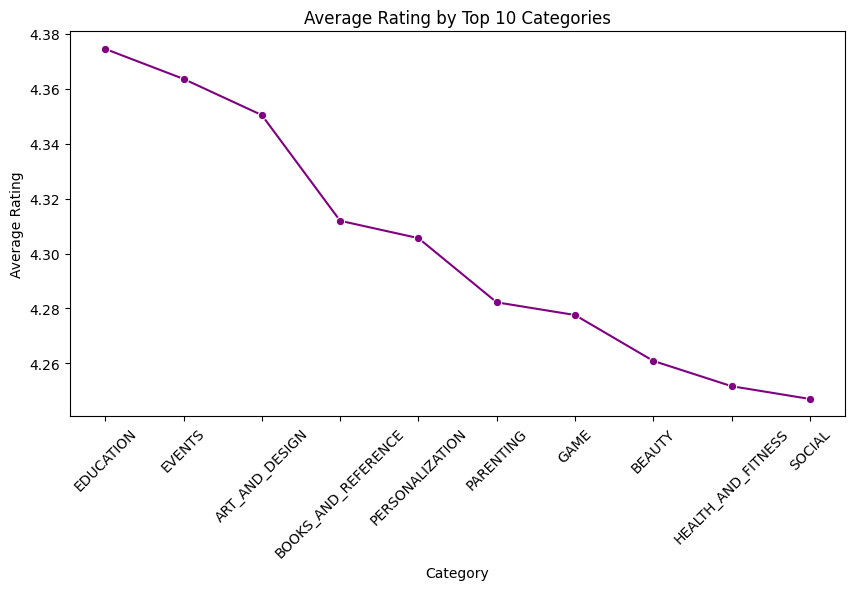


 INSIGHTS SUMMARY:
1 Top categories with most apps: ['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PRODUCTIVITY', 'PERSONALIZATION', 'LIFESTYLE', 'COMMUNICATION', 'FINANCE']
2 Average app rating: 4.19
3 Free apps dominate the market (~ 92.6 %).
4 Reviews and Installs show a strong positive correlation.
5 Paid apps tend to have slightly higher ratings but fewer installs.

 Final dataset saved as playstore_for_powerbi.csv (for Power BI upload)
 Data Analysis Completed Successfully!


In [5]:

# STEP 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inline plotting for Colab
%matplotlib inline

# STEP 2: Load Dataset
df = pd.read_csv("/content/cleaned_playstore.csv")

print("Dataset Loaded Successfully!\n")
print("Dataset Overview:")
print(df.info())
print("\nPreview:")
print(df.head())


# STEP 3: Data Cleaning & Preprocessing
print("\n Checking Missing Values:")
print(df.isnull().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Handle invalid ratings (greater than 5)
df = df[df['Rating'] <= 5]

# Convert numeric columns stored as strings
cols_to_clean = ['Reviews', 'Installs', 'Price']
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace('[+,₹$]', '', regex=True).astype(float)

# Handle missing values in 'Type' safely
df['Type'] = df['Type'].fillna('Free')
df['Type'] = df['Type'].astype(str).str.strip()

# Add derived column 'isPaid'
df['isPaid'] = df['Type'].apply(lambda x: 1 if x.lower() == 'paid' else 0)

# Save cleaned dataset
df.to_csv('cleaned_playstore_final.csv', index=False)
print("\nCleaned dataset saved as cleaned_playstore_final.csv")

# STEP 4: Exploratory Data Analysis (EDA)
print("\n Starting EDA...")

# Summary statistics
print("\nStatistical Summary:")
print(df.describe())

# ---- Top Categories ----
category_count = df['Category'].value_counts().head(10)
print("\nTop 10 Categories:\n", category_count)

plt.figure(figsize=(10,5))
sns.barplot(x=category_count.index, y=category_count.values, palette="viridis")
plt.title("Top 10 App Categories by Count")
plt.xticks(rotation=45)
plt.ylabel("Number of Apps")
plt.show()

# ---- Distribution of Ratings ----
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# ---- Free vs Paid Apps ----
plt.figure(figsize=(6,6))
df['Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
plt.title("Free vs Paid App Distribution")
plt.ylabel("")
plt.show()

# ---- Correlation Analysis ----
numeric_df = df[['Rating', 'Reviews', 'Installs', 'Price']]
corr = numeric_df.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Rating, Reviews, Installs, Price)")
plt.show()

# ---- Average Rating by Category ----
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.lineplot(x=avg_rating.index, y=avg_rating.values, marker='o', color='purple')
plt.title("Average Rating by Top 10 Categories")
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.show()

# -----------------------------
# STEP 5: Insights
# -----------------------------
print("\n INSIGHTS SUMMARY:")
print("1 Top categories with most apps:", category_count.index.tolist())
print("2 Average app rating:", round(df['Rating'].mean(), 2))
print("3 Free apps dominate the market (~", round((df['isPaid']==0).mean()*100, 1), "%).")
print("4 Reviews and Installs show a strong positive correlation.")
print("5 Paid apps tend to have slightly higher ratings but fewer installs.")

# -----------------------------
# STEP 6: Save for Power BI
# -----------------------------
df.to_csv("playstore_for_powerbi.csv", index=False)
print("\n Final dataset saved as playstore_for_powerbi.csv (for Power BI upload)")
print(" Data Analysis Completed Successfully!")
